In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [ ]:
df = pd.read_csv('/content/CPU_benchmark.csv')
df.head()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,"108,822",NaN,"3,330",NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,"88,338",12.10,"2,635",0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,"86,006",NaN,"2,387",NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,"85,861",12.16,"2,727",0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,"83,971",12.33,"2,626",0.39,280.0,299.9,64,2020,sWRX8,Desktop


## Performing cleaning operations

In [ ]:
df=df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df = df.dropna()

## hierarchical clustering 

tdp vs threadvalue clustering

In [ ]:
from scipy.cluster.vq import whiten

df['tdp_scaled'] = whiten(df['TDP'])
df['threadval_scaled'] = whiten(df['threadValue'])

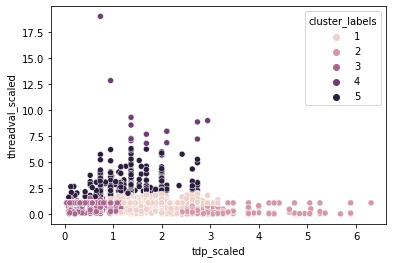

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(df[['tdp_scaled', 'threadval_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='tdp_scaled', y='threadval_scaled', hue='cluster_labels', data=df);

**Advantages**

• Easy to implement

• With a large number of variables, K-­‐Means may be computaHonally faster than
hierarchical clustering (if K is small).

• k-­‐Means may produce Hghter clusters than hierarchical clustering

• An instance can change cluster (move to another cluster) when the centroids are re-­‐
computed.
